In [ ]:
#한글오류

# 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False) 

In [224]:
from google.colab import drive
drive.mount('/content/drive')

import io
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Name :** 게임의 이름입니다.

**Platform : **게임이 지원되는 플랫폼의 이름입니다.

**Year :** 게임이 출시된 연도입니다.

**Genre :** 게임의 장르입니다.

**Publisher **: 게임을 제작한 회사입니다.

**NA_Sales **: 북미지역에서의 출고량입니다.

**EU_Sales** : 유럽지역에서의 출고량입니다.

**JP_Sales **: 일본지역에서의 출고량입니다.

**Other_Sales** : 기타지역에서의 출고량입니다.

Keywords (참조용)    Section 1때 배운 내용들은 다음과 같습니다.

Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization

Sprint 2 : Hypothesis Test, CI, Bayesian

Sprint 3 : DR, PCA, Cluster **굵은 텍스트**

반드시 들어가야 하는 내용.
앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 
그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

# 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
지역별 출고량< 장르
# 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
연도별/출고량
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
출고량 높은순으로 시각화

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를완성하세요.

# **전처리과정**

In [225]:
filename = '/content/drive/My Drive/vgames2.csv'
filename
df = pd.read_csv(filename)
df


# 앞에 언네임드 지우기
df = df.drop(df.columns[0], axis=1)
df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [226]:
#데이터체크

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [227]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [228]:
year = df.Year.unique()
temp = []
for i in year:
    if i <= 1900:
        print(i)
        temp.append(i)


9.0
97.0
11.0
15.0
3.0
96.0
6.0
8.0
1.0
5.0
4.0
10.0
98.0
7.0
16.0
86.0
14.0
95.0
2.0
13.0
0.0
12.0
94.0


In [229]:
# 데이터 수치 통일화를 위해서 년도 데이터 변경
df.loc[(df.Year.values <= 50), 'Year'] += 2000
df.loc[((df.Year.values >= 100) & (df.Year.values <= 100)), 'Year'] += 1900


In [230]:
# 변경확인
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     376
2000.0     349
2016.0     344
1999.0     338
1997.0     287
1996.0     260
1995.0     215
1994.0     120
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
95.0         4
2017.0       3
96.0         3
98.0         3
97.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, dtype: int64

In [231]:
#결측치제거

df.dropna(subset=["Publisher"], inplace=True)
df.dropna(subset=["Genre"], inplace=True)
df["Year"].fillna(df["Year"].median(), inplace=True)
df["Year"] = df["Year"].astype("int64")

In [201]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [202]:
df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.duplicated().sum()

In [204]:
df.EU_Sales.value_counts()

0        5630
0.01     1470
0.02     1247
0.03      919
0.04      727
         ... 
1.88        1
8.89        1
2.93M       1
2130K       1
7.06        1
Name: EU_Sales, Length: 360, dtype: int64

In [205]:
# K 와 M 있는지 파악하기
df[df.NA_Sales.str.contains('K')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0K,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009,Sports,Eidos Interactive,0K,0.01,0,0
16194,Vin Diesel: Wheelman,PS3,2009,Racing,Ubisoft,120K,0.15,0,0.06
16330,Midway Arcade Treasures,PS2,2003,Misc,Midway Games,720K,0.56,0,0.19
16492,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [88]:
df[df.NA_Sales.str.contains('M')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
447,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15
625,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
672,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23M,0.3,0,0.14
...,...,...,...,...,...,...,...,...,...
15986,Juiced 2: Hot Import Nights,PC,2007.0,Racing,THQ,0M,0.01,0,0
16152,Taiko no Tatsujin Wii,Wii,2008.0,Misc,Namco Bandai Games,0M,0,0.67,0
16169,Medal of Honor: Airborne,X360,2007.0,Shooter,Electronic Arts,0.45M,0.53,0.01,0.12
16408,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09


In [232]:
# Sales  K 와 M 제거하기 ! 
sales_col = df.columns[5:]

# K인 곳의 인덱스 저장
loc_k = df[df.NA_Sales.str.contains('K')].index

for col in sales_col:
    # k인 데이터 위치 가져오기
    na_k = df.loc[df[col].str.contains('K'), col]
    # m인 데이터 위치 가져오기
    na_m = df.loc[df[col].str.contains('M'), col]
    # 1000으로 나누고 K빼고 저장
    na_k = na_k.str.replace('K', '').astype(float) / 1000
    # M 빼고 저장
    na_m = na_m.str.replace('M', '').astype(float)
    
    # 기존 type이 string이기 때문에 변경해서 저장하기
    df.loc[df[col].str.contains('K'), col] = na_k.astype(str)
    df.loc[df[col].str.contains('M'), col] = na_m.astype(str)
df.loc[loc_k]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,0.48,0.33,0.0,0.06
45,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,0.06,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0.0,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0.0,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0.0,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009,Sports,Eidos Interactive,0.0,0.01,0,0
16194,Vin Diesel: Wheelman,PS3,2009,Racing,Ubisoft,0.12,0.15,0,0.06
16330,Midway Arcade Treasures,PS2,2003,Misc,Midway Games,0.72,0.56,0,0.19
16492,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0,0.12


In [233]:
col = df.columns[-4:]
# 실수형으로 변환
df[col] = df[col].astype(float)
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

전처리 K,M 연도 완료

In [234]:
# Global_Sales 추가로 만들기
global_sales = []
for i in df.index:
    g_sales = df.loc[i, 'NA_Sales' : 'Other_Sales'].sum()
    global_sales.append(round(g_sales, 2))
df['Global_Sales'] = global_sales
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08


In [ ]:
#지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
#지역별 판매량 - 장르 묶어서 높은순으로표기?

In [235]:
temp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
temp_grouped = temp_genre.groupby(['Genre']).sum()
temp_table = temp_grouped.reset_index()

temp_table.columns = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
temp_table.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,874.52,522.08,157.44,186.42
1,Adventure,105.53,64.00,51.87,16.81
2,Fighting,221.53,100.12,87.34,36.20
3,Misc,402.48,210.31,105.23,73.94
4,Platform,446.44,201.11,130.65,51.53


In [236]:
temp_melted = pd.melt(temp_table, id_vars=['Genre'], value_vars=temp_table.columns[1:],
                      var_name='Country', value_name='Sales')
temp_melted.head()

,Genre,Country,Sales
0,Action,NA_Sales,874.52
1,Adventure,NA_Sales,105.53
2,Fighting,NA_Sales,221.53
3,Misc,NA_Sales,402.48
4,Platform,NA_Sales,446.44


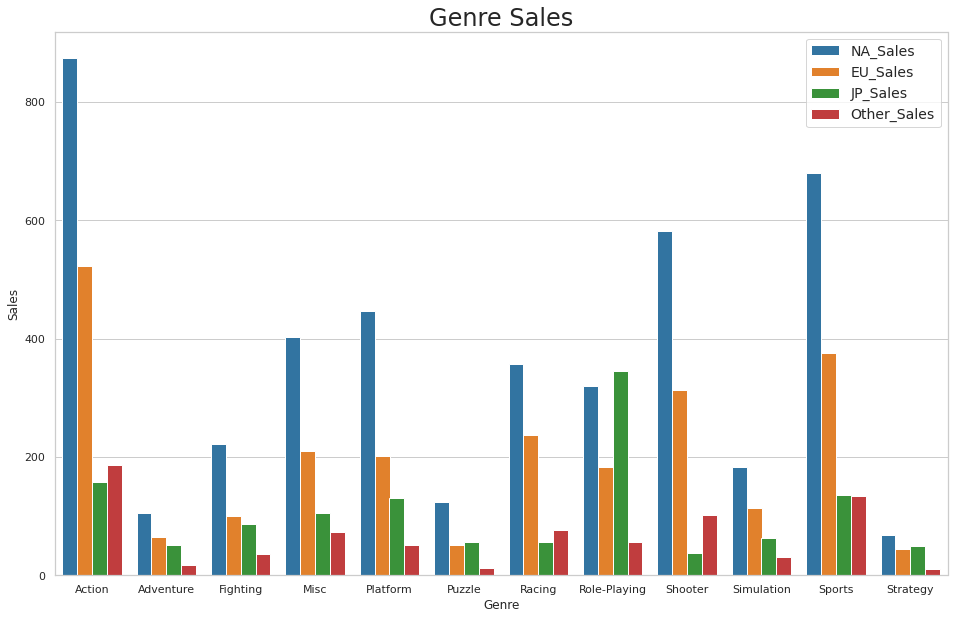

In [237]:
plt.figure(figsize=(16, 10))
sns.barplot(data=temp_melted, x='Genre', y='Sales', hue='Country')
plt.title('Genre Sales', loc='center', fontsize=24)
plt.legend(fontsize=14)
plt.show()

**Action -> Sports -> Shooter 순으로 장르별 선호도를 알수있다**

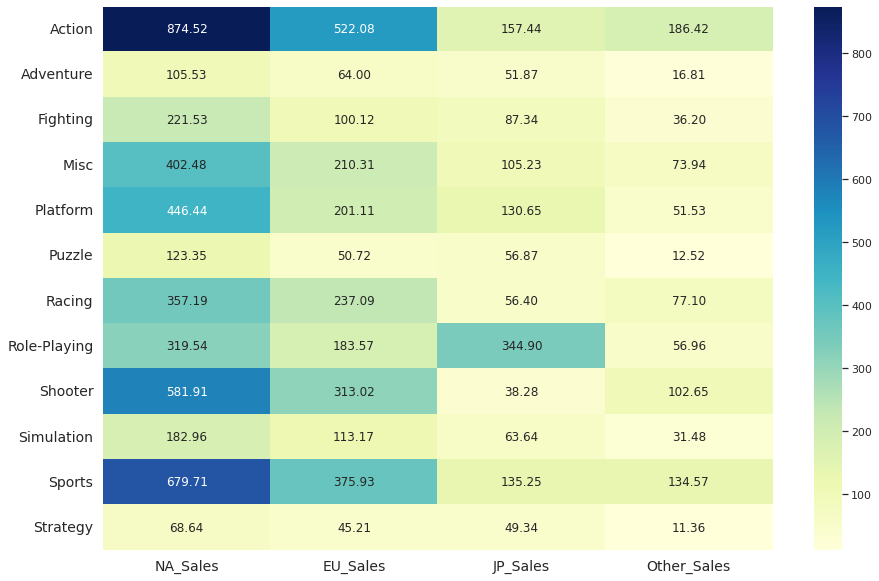

In [238]:
plt.figure(figsize=(15, 10))

a = sns.heatmap(temp_grouped, annot=True, fmt = '.2f', cmap="YlGnBu")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
a.set_ylabel('', fontsize=12)
plt.show()

**미국과 유럽은 비슷한 양상의 선호도 / 일본은 롤플레이를 좀더 선호!**


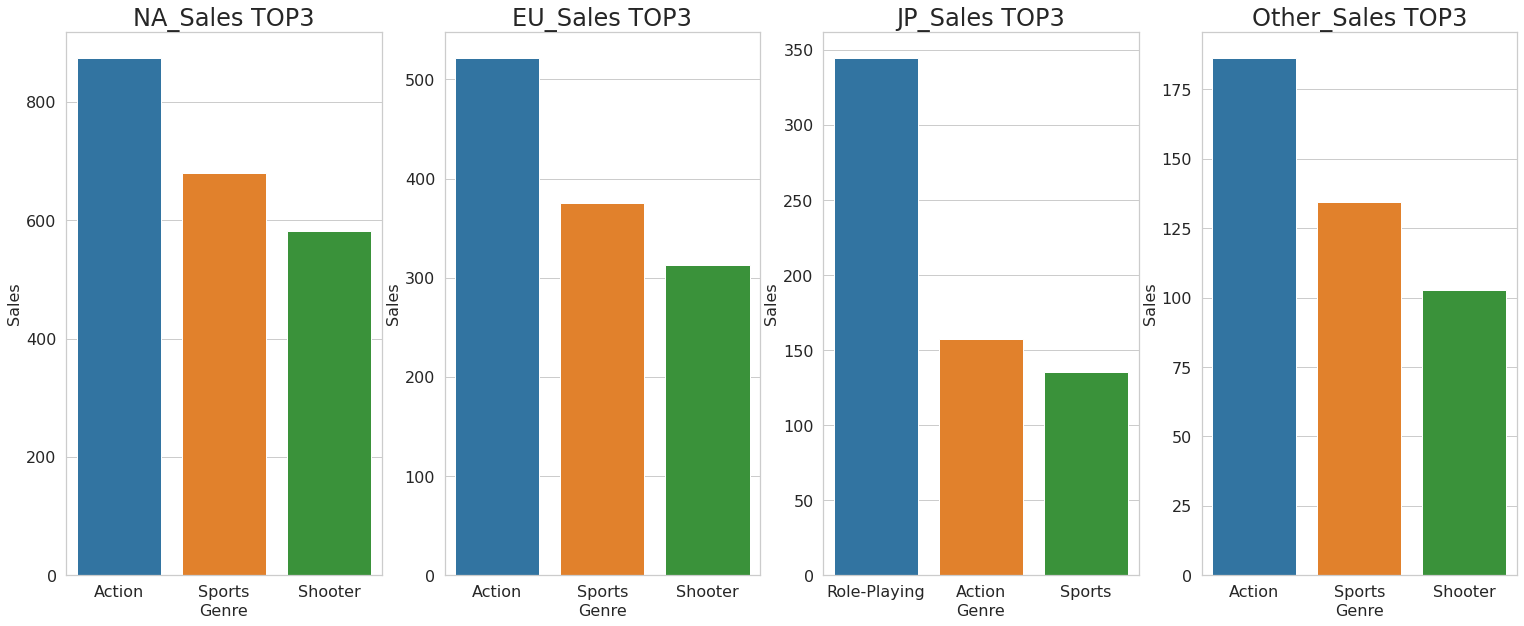

In [240]:
# 국가별 판매량 TOP3
def top3_genre(df, sales_col):
    new_df = df.loc[:, ['Genre', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['Genre', 'Sales']
    return new_df

# Top3 데이터 만들기
na_genre_top3 = top3_genre(temp_table, 'NA_Sales')
eu_genre_top3 = top3_genre(temp_table, 'EU_Sales')
jp_genre_top3 = top3_genre(temp_table, 'JP_Sales')
other_genre_top3 = top3_genre(temp_table, 'Other_Sales')

# 데이터 리스트에 담기
data_list = [na_genre_top3, eu_genre_top3, jp_genre_top3, other_genre_top3]
columns_list = temp_table.columns[1:]

# 막대 그래프 그리기
fig, axs = plt.subplots(figsize=(26, 10), nrows=1, ncols=4)
for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=24)
    sns.barplot(x='Genre', y='Sales', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=16)
    axs[i].set_xlabel('Genre', fontsize=16)
    axs[i].set_ylabel('Sales', fontsize=16)
plt.show()

**전반적으로 Aciton장르를 선호**

In [221]:
#연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
#연도별/출고량--- 트렌드(장르) 가설검증?

In [241]:
# 년도별 장르 갯수
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
# 가장 값이 큰 값만 뽑기
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
# 중복값 제외하기
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_genre[:5]
year_max_genre.columns = ['Year', 'Genre', 'Sales']



In [242]:
# 장르값 할당하기
genre = year_max_genre['Genre'].values

# Global sales 
year_max_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
condition = year_max_sales['Global_Sales'] == year_max_sales.groupby(['Year'])['Global_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['Year', 'Genre', 'Global_Sales']
year_max_sales[:5]



,Year,Genre,Global_Sales
0,86,Platform,1.05
1,94,Fighting,0.02
4,95,Shooter,0.62
7,96,Racing,0.90
9,97,Action,0.37


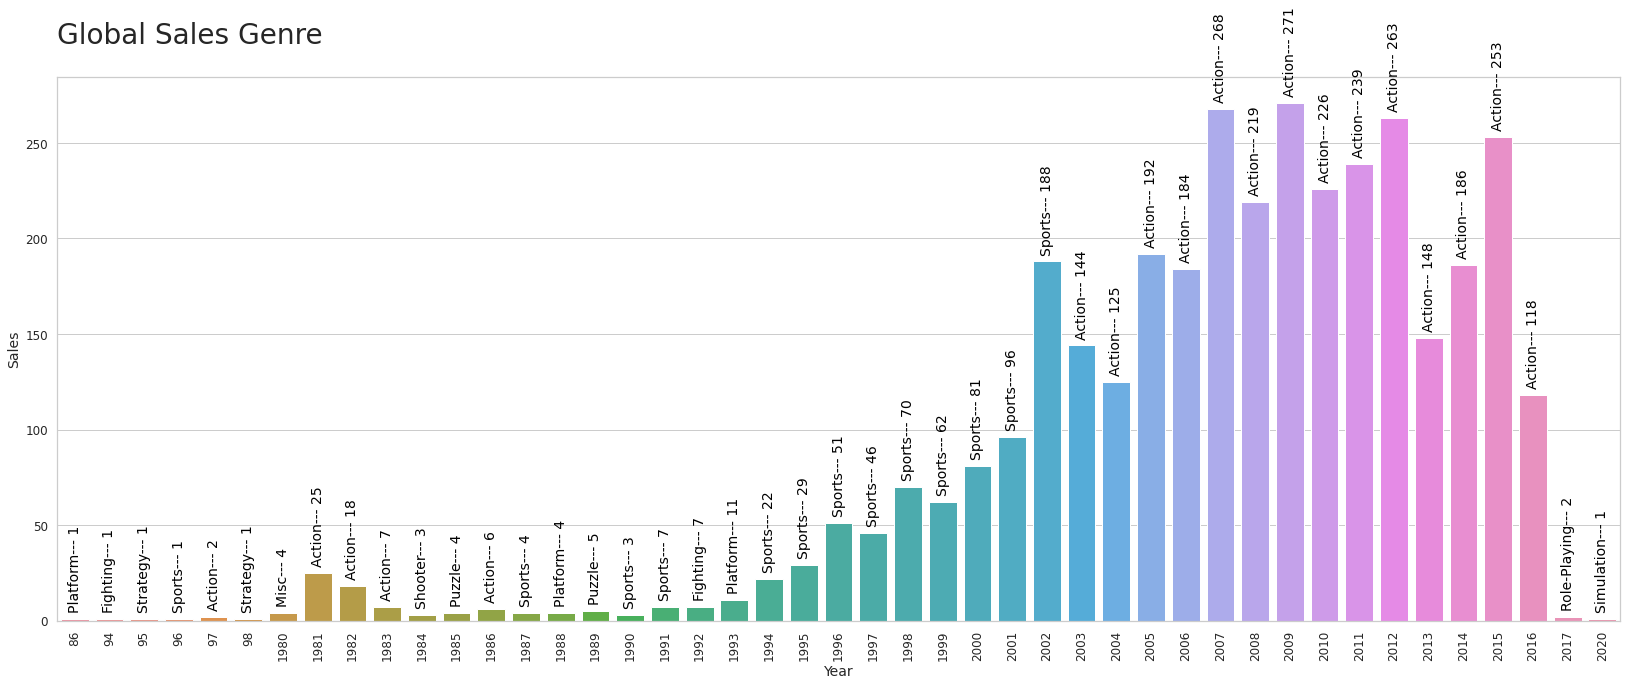

In [243]:

sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='Sales', data=year_max_genre)
idx = 0
for value in year_max_genre['Sales']:
    ax.text(x=idx, y=value + 5, s=str(genre[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
ax.set_title('Global Sales Genre', fontsize=28, y=1.05, loc='left')
plt.show()

**86년도~ 93년도 까지는 다양한 장르를 사람들이 게임을 즐겼으며**

**94년도~ 2002년도까지 스포츠게임을 즐겨했다.**

**2003년도 이후로는 액션장르가 선호도가 높았다.** 

In [245]:
# 년도별 최고 판매량 기록한 장르 데이터프레임 만들기
year_max_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
condition = year_max_sales['Global_Sales'] == year_max_sales.groupby(['Year'])['Global_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['Year', 'Genre', 'Global_Sales']


In [246]:
genre = year_max_sales['Genre'].values

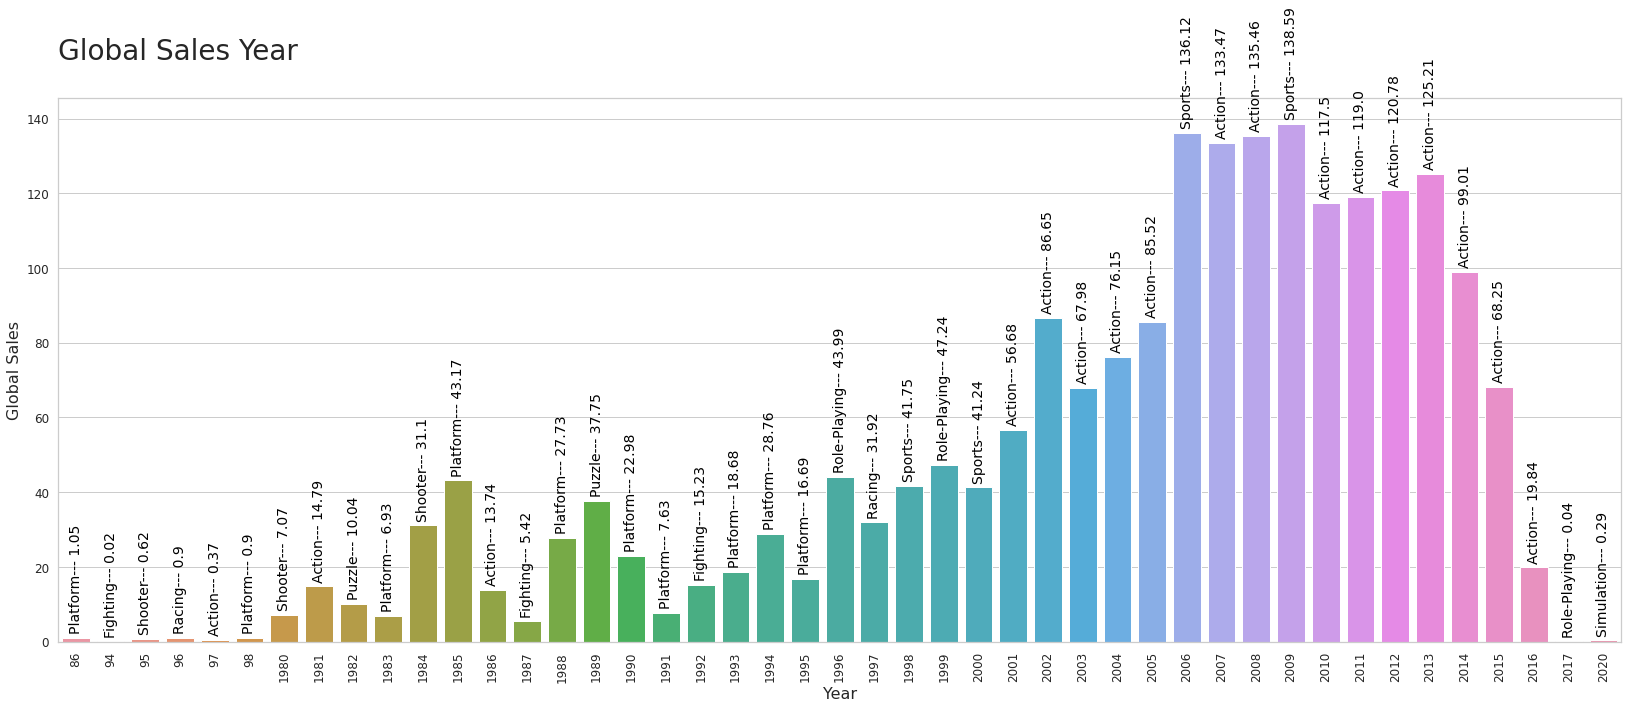

In [251]:
plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='Global_Sales', data=year_max_sales)
idx = 0
for value in year_max_sales['Global_Sales']:
    ax.text(x=idx, y=value + 2, s=str(genre[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('Global Sales Year', y=1.06, fontsize=28, loc='left')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Global Sales', fontsize=16)
plt.show()

연도별 최고 판매량을 기록한 장르는 Action이다 
트렌드를 보여주는 판매율

In [ ]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
#출고량 높은순으로 시각화  게임판매량/장르/

In [136]:
# 판매량 Top10
sales_top10 = df.loc[df.Global_Sales.sort_values(ascending=False).index].reset_index(drop=True).head(10)
rank = [str(x)+' ' for x in range(1, 11)]
sales_top10['rank'] = rank
sales_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,8
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,9
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,10


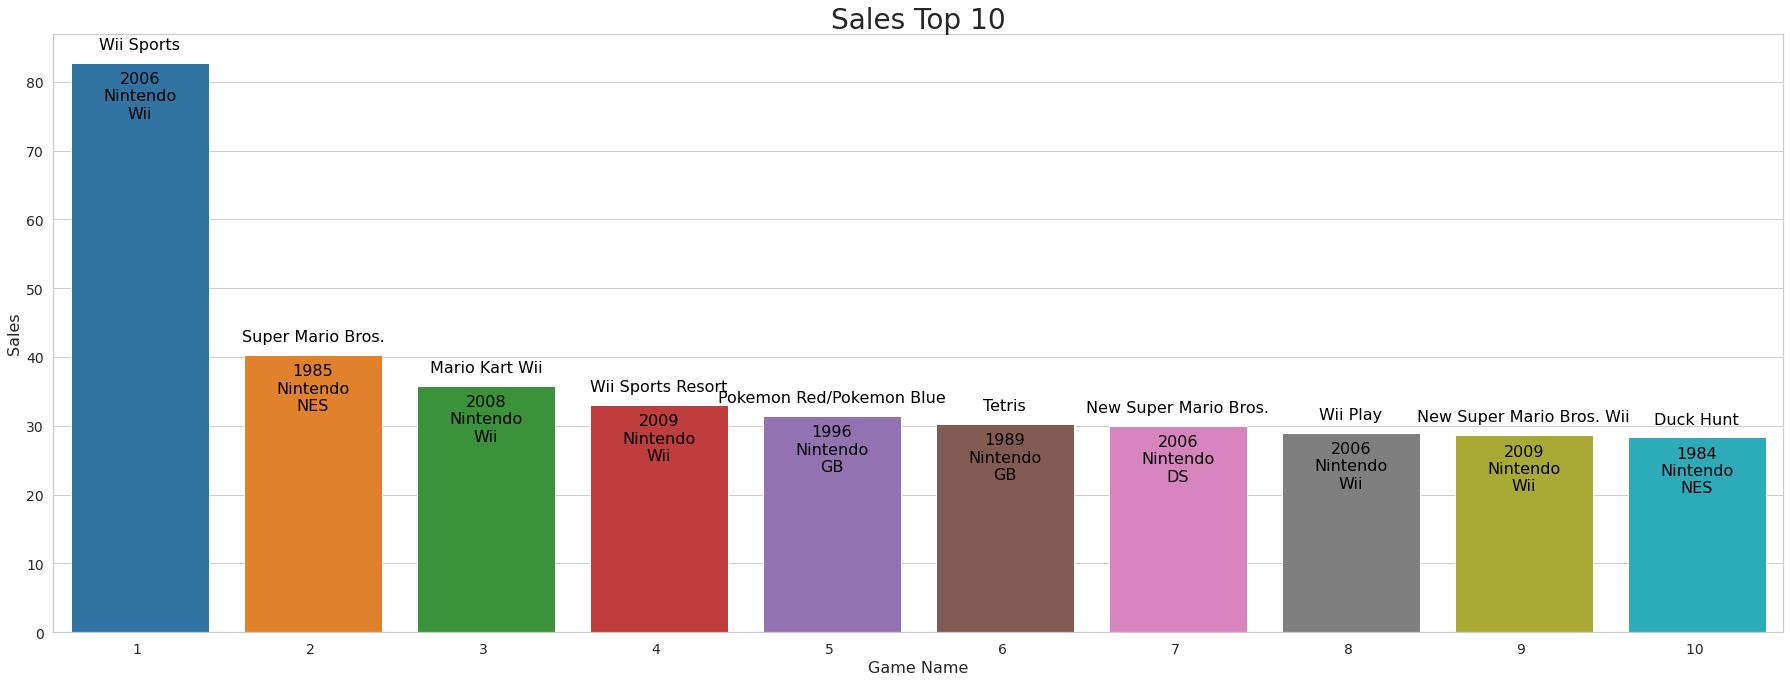

In [182]:
plt.figure(figsize=(31,11))
a = sns.barplot(x='rank', y='Global_Sales', data=sales_top10)
i = 0
for name, year, val, platform, publisher in zip(sales_top10.Name, sales_top10.Year, sales_top10.Global_Sales, 
                                                sales_top10.Platform, sales_top10.Publisher):
    a.text(x=i, y=val+2, s=(name), color='black', ha='center', fontsize=16)
    a.text(x=i, y=val-8, s=(str(year) + '' + '\n' + publisher + '\n' + platform), color='black', ha='center', fontsize=16)
    i+=1
a.set_title('Sales Top 10', fontsize=28)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Game Name', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

In [138]:
year_sales_top_game = df[df.Year >= 2011].sort_values('Global_Sales', ascending=False).head(10)
year_sales_top_game = year_sales_top_game.reset_index(drop=True)
year_sales_top_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
5,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
6,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
7,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
8,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
9,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33


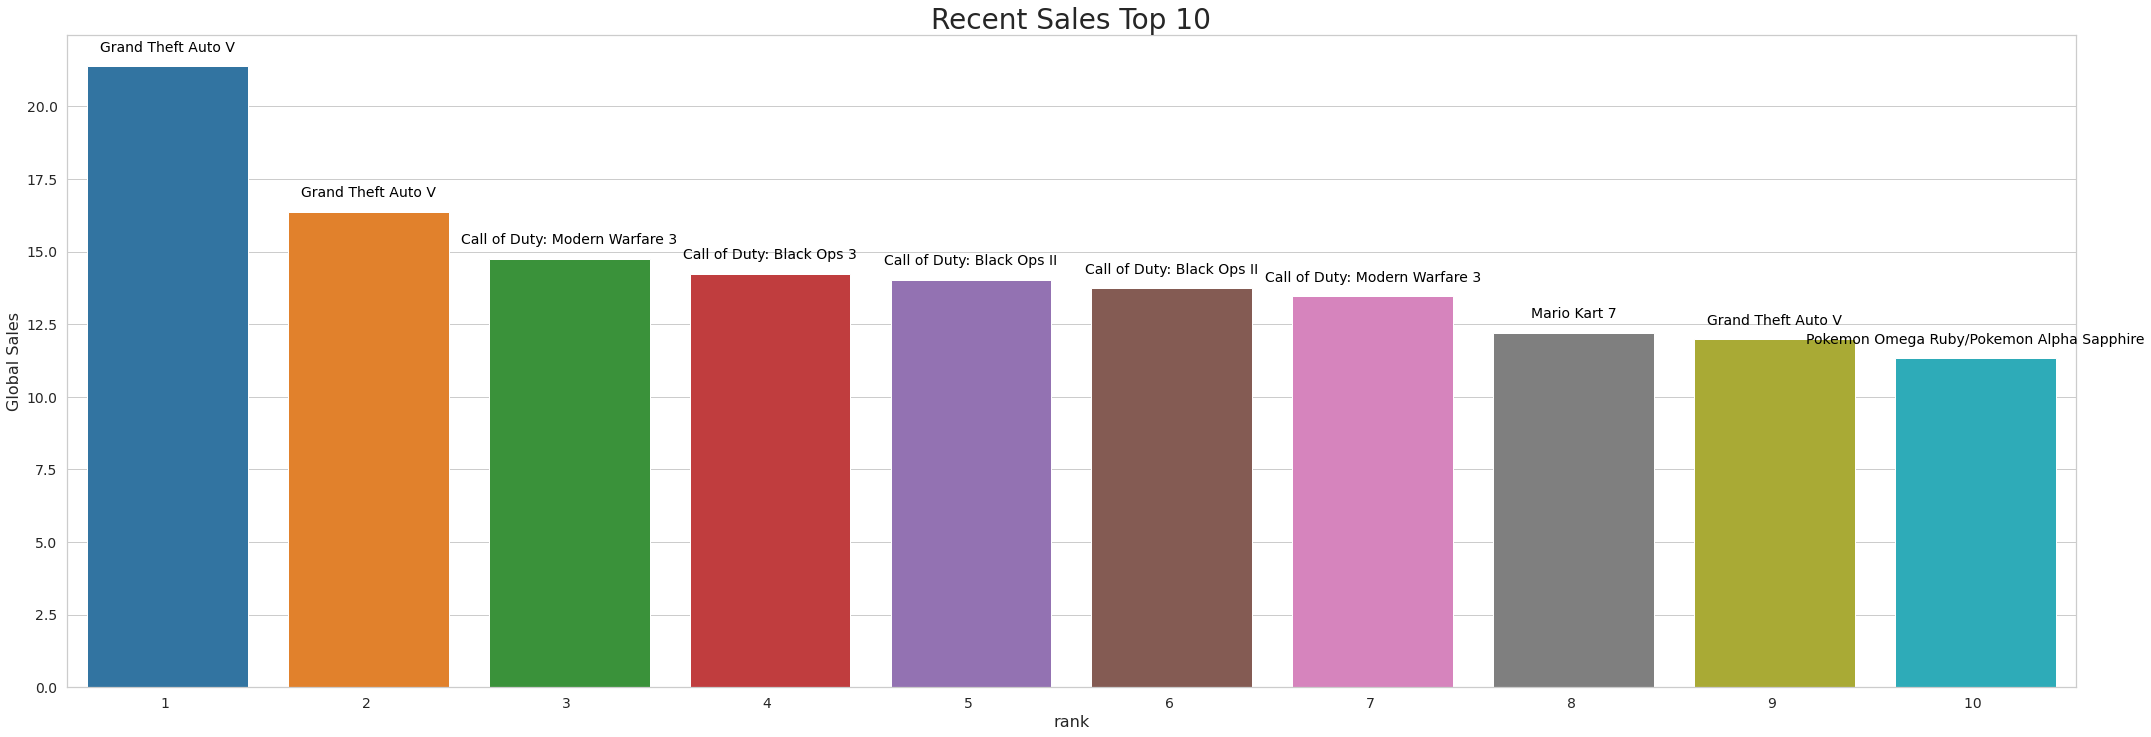

In [181]:
plt.figure(figsize=(36,12))
a = sns.barplot(x = year_sales_top_game.index, y='Global_Sales', data=year_sales_top_game)
i = 0
for name, val in zip(year_sales_top_game.Name, year_sales_top_game.Global_Sales):
    a.text(x=i, y=val+0.5, s=(name), color='black', ha='center', fontsize=14)
   
    i+=1
a.set_title('Recent Sales Top 10', fontsize=28)
plt.xticks(ticks=[x for x in range(10)], labels=[str(x)+' ' for x in range(1, 11)],fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('rank', fontsize=16)
plt.ylabel('Global Sales', fontsize=16)
plt.show()

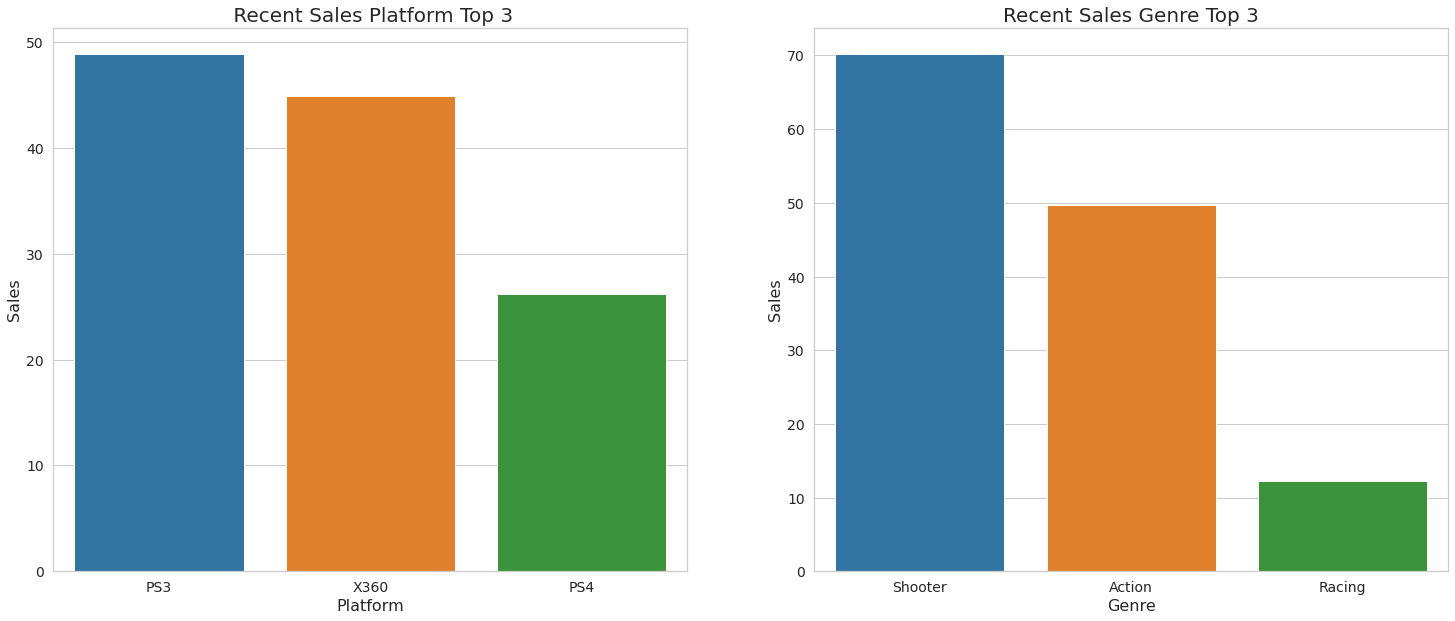

In [173]:
def recent_year_Top3_sales(df, col, sales):
    return df.groupby(col)[sales].sum().reset_index(name='sales').sort_values('sales', ascending=False).head(3)


# 최근 10년 플랫폼 판매량 Top3
platform_sales_top3 = recent_year_Top3_sales(year_sales_top_game, 'Platform', 'Global_Sales')
# 최근 10년 장르 판매량 Top3
genre_sales_top3 = recent_year_Top3_sales(year_sales_top_game, 'Genre', 'Global_Sales')

data_list = [platform_sales_top3, genre_sales_top3]
titles = [' Recent Sales Platform Top 3', 'Recent Sales Genre Top 3']
x_labels = ['Platform', 'Genre']

fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=2)
for i, data, title in zip(range(3), data_list, titles):
    sns.barplot(x=data.iloc[:,0], y=data.iloc[:,1], ax=axs[i])
    axs[i].set_title(titles[i], fontsize=20)
    axs[i].tick_params(labelsize=14)
    axs[i].set_xlabel(x_labels[i], fontsize=16)
    axs[i].set_ylabel('Sales', fontsize=16)
plt.show()